# Download Tweets using Twitter API

In [1]:
import tweepy
from tweepy import OAuthHandler

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

In [5]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import bigrams
import string
import time

In [6]:
import operator
from collections import Counter

In [7]:
import wordcloud
from wordcloud import WordCloud

In [10]:
consumer_key = 'Xa7aIbJUcl9v99atEpBdd0qkV'
consumer_secret = '6fP1ekUyWt8tHHJyBpBuegBP2Pyc3QUP2qSMlTnvD57jqlO9Ts'
access_token = '856486397569585152-WVQO5AbHMYBxu5BGwGY3YiWVqXDeM9E'
access_secret = 'jMLawYHvM9h6eLQZAL5v4jMxPkCij1SKkKVmsDPJ9M3Vf'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [19]:
# Create a new csv file to dump data
import csv
csvFile = open('metoo.csv','a')
csvWriter = csv.writer(csvFile)

In [ ]:
#Download tweets to csv file
c = tweepy.Cursor(api.search,q="metoo",lang='en').items()
while True:
    try:
        tweet = c.next()
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet.favorite_count, tweet.retweet_count, tweet.id, tweet.lang, tweet.user.screen_name,tweet.user.favourites_count,tweet.user.followers_count])
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break
    

# Tidy up tweets a bit

In [ ]:
#processing tweets to get rid of blank line and to merge lines of same tweet together 
with open('metoo.csv', 'r') as f:
    tweet = [line.rstrip() for line in f]
tweet_rm = [item for item in tweet if item != '']
for i in range(1,len(tweet_rm)-300):
    if '2017' not in tweet_rm[i]:
        tweet_rm[i-1:i+1] = [''.join(tweet_rm[i-1:i+1])]       

In [103]:
#Save processed tweets to a new csv
with open('metoo_tweet.csv','w') as f:
    newfile = csv.writer(f)
    newfile.writerow(tweet_rm)

# Explore the tweets by counting most common words, hashtags, @, and word co-occurence using bigram

In [287]:
punctuation = list(string.punctuation)
letter = list(string.ascii_lowercase)
stop = stopwords.words('english') + punctuation + ['&amp;','rt', 'via','the','i','we'] + letter

In [286]:
count_word = Counter()
count_bigram = Counter()
count_hashtag = Counter()
count_at = Counter()

for item in tweet_rm:
    item_l = str.lower(item)
    if len(item_l.split(',')) > 1:
        word = [term for term in item_l.split(',')[1].split() if (term not in stop) and ('#' not in term)]
        bigram = bigrams(word)
        count_word.update(word)
        count_bigram.update(bigram)
        hashtag = [term for term in item_l.split(',')[1].split() if ('#'in term) and ('metoo' not in term)]
        count_hashtag.update( hashtag)
        at = [term for term in item_l.split(',')[1].split() if ('@'in term) and ('metoo' not in term)]
        count_at.update(at)
    
print(count_bigram.most_common(20))
        

c:\python27\lib\site-packages\ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


[(('story', 'men'), 254), (('sexual', 'harassment'), 239), (('men', 'womeni'), 228), (('sexual', 'assault'), 151), (('elizabeth', 'warren'), 130), (('clueless', 'men'), 125), (('warren', 'joins'), 110), (('joins', 'campaign:'), 110), (('campaign:', 'portrays'), 109), (('portrays', 'professor'), 108), (('sexual', 'predator'), 105), (('professor', 'praised'), 105), (('sen.', 'elizabeth'), 95), (('womeni', 'was\xe2\x80\xa6'), 88), (('praised', 'sexual'), 77), (('must', 'challenge'), 65), (('men', 'sexual'), 65), (('stay.', 'must'), 63), (('challenge', 'men'), 61), (('opinion', 'clueless'), 54)]


In [280]:
word = count_word.most_common(30)
word_table = pd.DataFrame()
word_table['name'] = [item[0] for item in word]
word_table['frequency'] = [item[1] for item in word]
word_dic = word_table.set_index('name')['frequency'].to_dict()
del word_dic['"i'],word_dic['get'],word_dic["don't"],word_dic["it's"],word_dic['one'],word_dic['hashtag']

In [232]:
hashtag = count_hashtag.most_common(20)
hashtag_table = pd.DataFrame()
hashtag_table['name'] = [item[0] for item in hashtag]
hashtag_table['frequency'] = [item[1] for item in hashtag]
hash_dic = hashtag_table.set_index('name')['frequency'].to_dict()
del hash_dic['#sextrafficking\xe2\x80\xa6']
del  hash_dic['#']
hash_dic['#abused'] = 100 #decrease the frequency of this #, for the purpose of visualization

In [248]:
at_people = count_at.most_common(20)
at_table =  pd.DataFrame()
at_table['name'] = [item[0] for item in at_people]
at_table['frequency'] = [item[1] for item in at_people]
at_dic = at_table.set_index('name')['frequency'].to_dict()
at_dic['@realdonaldtrump'] = 80 #decrease the frequency of this #, for the purpose of visualization

(-0.5, 999.5, 999.5, -0.5)

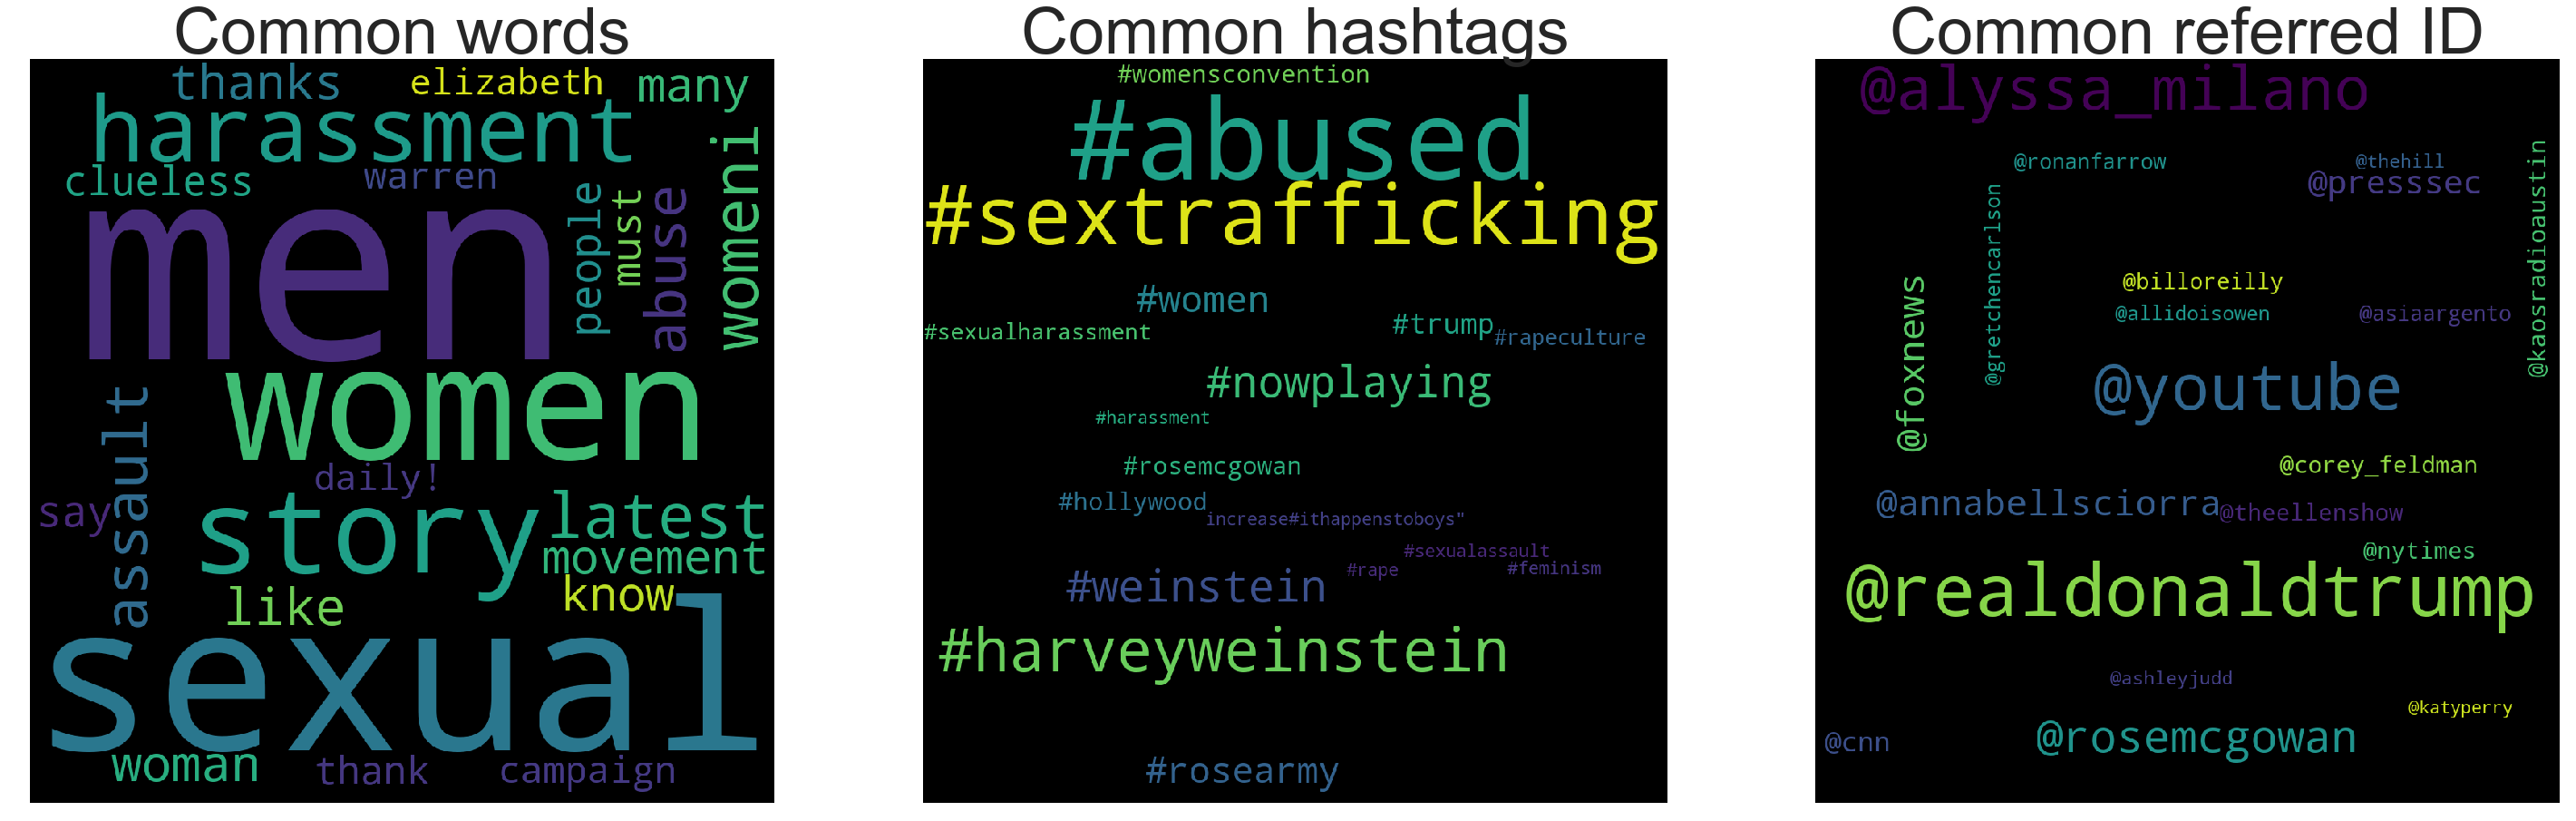

In [282]:
#Create word clouds for the most frequent terms
wc = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(word_dic)
wc1 = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(hash_dic)
wc2 = WordCloud(width=1000,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(at_dic)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(50,50))
ax1.imshow(wc,cmap='rainbow')
ax2.imshow(wc1,cmap='viridis')
ax3.imshow(wc2,cmap='viridis')
ax1.set_title('Common words',fontsize=72)
ax2.set_title('Common hashtags',fontsize=72)
ax3.set_title('Common referred ID',fontsize=72)
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
